In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

Корреляция между переменными "Улица" и "Гараж": -0.9999999999999997


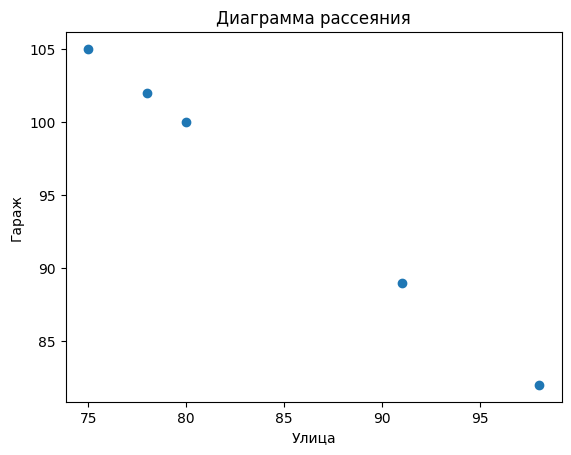

In [8]:
day = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница']
street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

# Расчет корреляции Пирсона
corr, _ = pearsonr(street, garage)
print('Корреляция между переменными "Улица" и "Гараж":', corr)

# Построение диаграммы рассеяния
plt.scatter(street, garage)
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.title('Диаграмма рассеяния')
plt.show()

In [9]:
data = pd.read_csv('World Population Live Dataset.csv')
data

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,MS,Montserrat,4,5,5,5,5,11,11,11,102,43.0392,0.99,0.00%,230
230,FK,Falkland Islands,4,4,3,3,3,2,2,2,12173,0.3105,1.00,0.00%,231
231,NU,Niue,2,2,2,2,2,3,4,5,260,7.4385,1.00,0.00%,232
232,TK,Tokelau,2,2,1,1,2,2,2,2,12,155.9167,1.01,0.00%,233


In [10]:
data.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5


In [11]:
data = data.dropna()

data.dtypes

CCA3                            object
Name                            object
2022                             int64
2020                             int64
2015                             int64
2010                             int64
2000                             int64
1990                             int64
1980                             int64
1970                             int64
Area (km²)                       int64
Density (per km²)              float64
GrowthRate                     float64
World Population Percentage     object
Rank                             int64
dtype: object

In [12]:
description = data.describe()
description

,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,Rank
count,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,233.000000,233.000000,2.330000e+02,233.000000,233.000000,233.000000
mean,3.420964e+04,3.363419e+04,3.185633e+04,2.996431e+04,2.637440e+04,2.280183e+04,19061.935622,15851.394850,5.804015e+05,454.054159,1.009828,117.381974
std,1.370452e+05,1.358665e+05,1.306714e+05,1.244725e+05,1.119271e+05,9.803272e+04,81952.642795,67933.817522,1.765561e+06,2070.359198,0.013802,67.815769
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,0.026100,0.910000,1.000000
25%,4.100000e+02,4.060000e+02,3.990000e+02,3.920000e+02,3.250000e+02,2.620000e+02,228.000000,150.000000,2.586000e+03,39.335500,1.000000,59.000000
50%,5.579000e+03,5.529000e+03,5.424000e+03,4.996000e+03,4.321000e+03,3.865000e+03,3147.000000,2675.000000,7.886500e+04,96.702600,1.010000,117.000000
75%,2.259400e+04,2.152300e+04,1.990600e+04,1.987800e+04,1.589900e+04,1.188300e+04,9829.000000,8862.000000,4.067520e+05,239.582100,1.020000,176.000000
max,1.425887e+06,1.424930e+06,1.393715e+06,1.348191e+06,1.264099e+06,1.153704e+06,982372.000000,822534.000000,1.709824e+07,23172.266700,1.070000,234.000000


In [13]:
target_variable = "2022"
target_data = data[target_variable]

# Построим и выведем корреляционную матрицу
correlation_matrix = data.corr(numeric_only = True)['2022'].to_frame().round(2)
correlation_matrix.style.background_gradient(cmap='coolwarm')

,2022
2022,1.000000
2020,1.000000
2015,1.000000
2010,1.000000
2000,0.990000
1990,0.990000
1980,0.980000
1970,0.970000
Area (km²),0.450000
Density (per km²),-0.030000


In [14]:
# Выберем наиболее коррелирующую переменную в качестве предиктора
most_correlated_variable = '2015'
predictor = data[most_correlated_variable]

# Создание матрицы признаков X и целевой переменной y
X = predictor.values.reshape(-1, 1)
y = target_data.values

# Инициализация и обучение модели линейной регрессии
regression_model = LinearRegression()
regression_model.fit(X, y)

# Получение предсказанных значений
y_predicted = regression_model.predict(X)

# Вычисление наклона и сдвига
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y, y_predicted)

# Вывод результатов
print("Наклон (slope):", slope)
print("Сдвиг (intercept):", intercept)
print("Среднеквадратичная ошибка (MSE):", mse)

Наклон (slope): 1.0482421155802528
Сдвиг (intercept): 816.4922362776197
Среднеквадратичная ошибка (MSE): 19078079.201597903


In [15]:
target_data.values

array([1425887, 1417173,  338290,  275501,  235825,  218541,  215313,
        171186,  144713,  127504,  123952,  123380,  115559,  110990,
         99010,   98187,   88551,   85341,   83370,   71697,   67509,
         65498,   64627,   59894,   59037,   54179,   54027,   51874,
         51816,   47559,   47250,   46874,   45510,   44903,   44496,
         41129,   39857,   39702,   38454,   37458,   36409,   35589,
         34628,   34050,   33938,   33697,   33476,   32970,   30548,
         29612,   28302,   28161,   27915,   26208,   26177,   26069,
         23893,   22674,   22594,   22125,   21832,   20405,   20018,
         19659,   19604,   19398,   18001,   17844,   17723,   17598,
         17564,   17316,   16768,   16321,   13859,   13777,   13353,
         12890,   12356,   12224,   11656,   11585,   11286,   11229,
         11212,   10913,   10549,   10494,   10433,   10385,   10358,
         10271,   10143,    9967,    9953,    9535,    9441,    9038,
          8940,    8

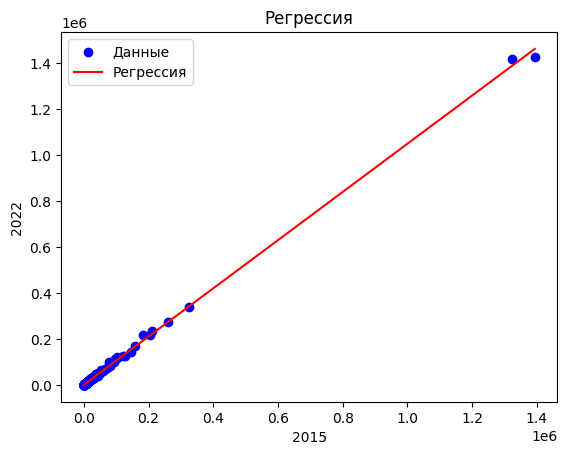

In [16]:
# Построение графика
plt.scatter(X, y, color='b', label='Данные')
plt.plot(X, y_predicted, color='r', label='Регрессия')
plt.xlabel(most_correlated_variable)
plt.ylabel(target_variable)
plt.title('Регрессия')
plt.legend()
plt.show()

In [18]:
data_ins = pd.read_csv('insurance.csv')
data_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
data_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
data_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
data_ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [24]:
unique_regions = data_ins['region'].unique()
unique_regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
# Создание списков с данными для каждого региона
region_data = []
for region in unique_regions:
    region_data.append(data_ins[data_ins['region'] == region]['bmi'])

# Выполнение однофакторного ANOVA теста
f_statistic, p_value = stats.f_oneway(*region_data)
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

F-статистика: 39.49505720170283
p-значение: 1.881838913929143e-24


In [26]:
# Используем библиотеку statsmodels
model = sm.formula.ols('bmi ~ region', data=data_ins).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

              df        sum_sq      mean_sq          F        PR(>F)
region       3.0   4055.880631  1351.960210  39.495057  1.881839e-24
Residual  1334.0  45664.319755    34.231124        NaN           NaN


In [27]:
bmi_by_region = []
for region in unique_regions:
    bmi_by_region.append(data_ins[data_ins['region'] == region]['bmi'].values)

# Перебор всех пар регионов
num_regions = len(unique_regions)
alpha = 0.05
bonferroni_correction = alpha / (num_regions * (num_regions - 1) / 2)
significant_pairs = []
for i in range(num_regions):
    for j in range(i + 1, num_regions):
        region1 = unique_regions[i]
        region2 = unique_regions[j]
        t_statistic, p_value = stats.ttest_ind(bmi_by_region[i], bmi_by_region[j])
        if p_value < bonferroni_correction:
            significant_pairs.append((region1, region2, p_value))

# Вывод значимых пар регионов
for pair in significant_pairs:
    print("Значимая разница между", pair[0], "и", pair[1], "с p-значением", pair[2])

Значимая разница между southwest и southeast с p-значением 5.4374009639680636e-09
Значимая разница между southwest и northwest с p-значением 0.001076958496307695
Значимая разница между southwest и northeast с p-значением 0.0019086161671573074
Значимая разница между southeast и northwest с p-значением 2.643571405230106e-19
Значимая разница между southeast и northeast с p-значением 1.186014937424813e-17


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


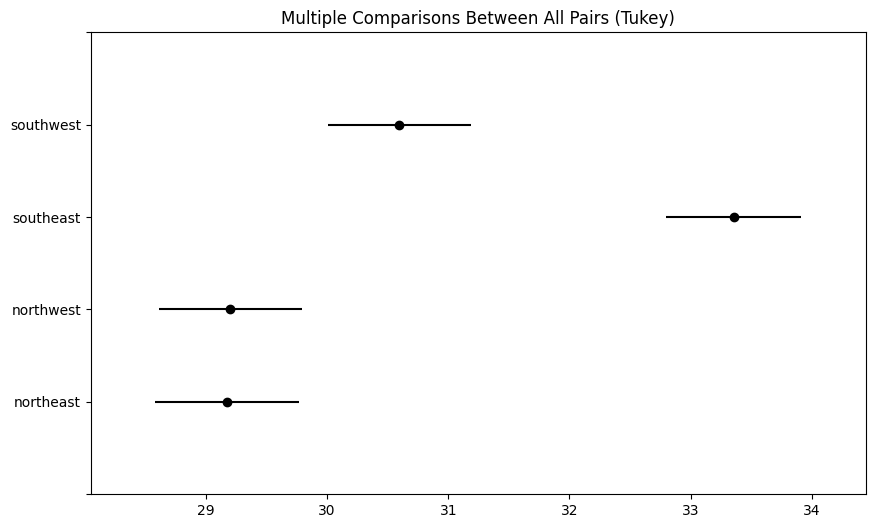

In [28]:
posthoc = pairwise_tukeyhsd(data_ins['bmi'], data_ins['region'])

# Построение графика пост-хок теста
posthoc.plot_simultaneous()

# Вывод результатов
print(posthoc.summary())

In [29]:
model = sm.formula.ols('bmi ~ region + sex', data=data_ins).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

              df        sum_sq      mean_sq          F        PR(>F)
region       3.0   4055.880631  1351.960210  39.539923  1.773031e-24
sex          1.0     86.007035    86.007035   2.515393  1.129767e-01
Residual  1333.0  45578.312720    34.192283        NaN           NaN
